In [1]:
# 소득에 따른 육류 판매량의 상관관계

# 가설 : 소득에 따라 육류 판매량의 차이는 있을 것이다

# 데이터 불러오기
import pandas as pd
df = pd.read_csv('ifood_df.csv', encoding = "cp949")
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


상관계수: 0.7024996196456791


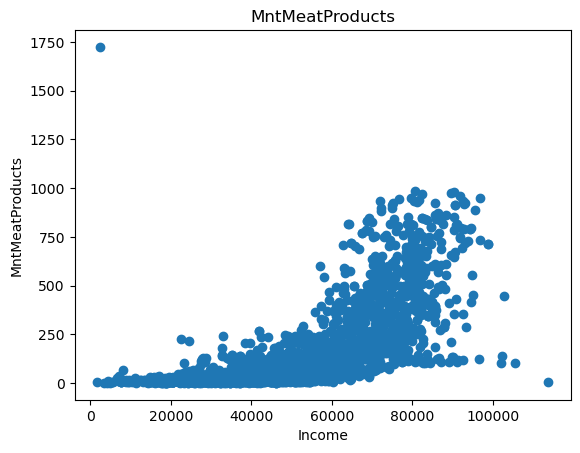

In [4]:
# 소득과 육류판매량의 상관성 검증과 시각화

import pandas as pd
import matplotlib.pyplot as plt

# 상관계수 계산
corrl = df['Income'].corr(df['MntMeatProducts'])
print(f'상관계수: {corrl}')

# 시각화(산점도)
plt.scatter(df['Income'], df['MntMeatProducts'])
plt.xlabel('Income')
plt.ylabel('MntMeatProducts')
plt.title('MntMeatProducts')
plt.show()

# 상관계수가 0.7로 상관성이 높다고 판단
# 시각화를 통해 소득이 높을수록 육류 판매량도 증가한다는 것을 볼 수 있음

# 수정사항 :
# 이상치 제거, 회귀모델 추가

회귀계수 (기울기): [0.00676658]
절편: -194.9657751159696


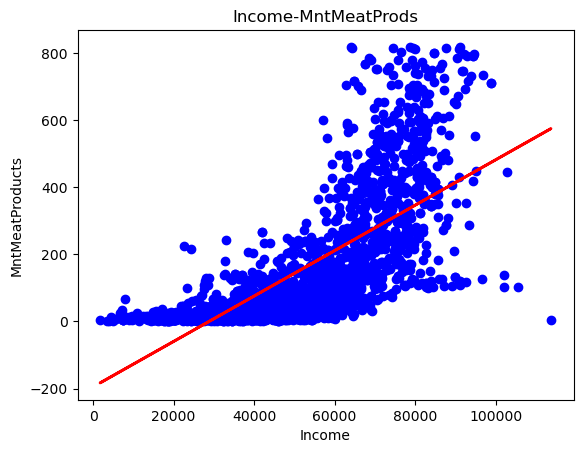

In [12]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# 독립변수와 종속변수 선택
X = df[['Income']]        # 독립변수로 'Income' 선택
y = df['MntMeatProducts']    # 종속변수로 'MntMeatProds' 선택

# Z-score 계산
z_scores = stats.zscore(y)

# Z-score가 특정 임계값을 넘는 데이터 포인트 제거
threshold = 3  # 예시로 임계값을 3으로 설정
outliers_removed = df[abs(z_scores) < threshold]

# 제거된 데이터로 회귀모델 재학습
X_cleaned = outliers_removed[['Income']]
y_cleaned = outliers_removed['MntMeatProducts']

# 선형 회귀 모델 초기화
model = LinearRegression()

# 회귀 모델 학습
model.fit(X_cleaned, y_cleaned)

# 회귀계수 및 절편 출력
print('회귀계수 (기울기):', model.coef_)
print('절편:', model.intercept_)

# 회귀모델 시각화
plt.scatter(X_cleaned, y_cleaned, color='blue')
plt.plot(X_cleaned, model.predict(X_cleaned), color='red', linewidth=2)
plt.xlabel('Income')
plt.ylabel('MntMeatProducts')
plt.title('Income-MntMeatProds')
plt.show()


In [ ]:
# 결론 :
# 수입에 따라 육슈 판매량은 상관성이 있다

# 회귀모델 선이 양의 상관관계를 나타내고 있다

# Insight :
# 육류 판매 매장의 할인 행사
# 고소득 층을 겨냥한 품질이 좋은 프리미엄 육류 판매